# 데이터 로드

필요한 패키지를 임포트하고 분석 환경을 적정히 설정

In [1]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 숨김
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
PIL.Image

<module 'PIL.Image' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\PIL\\Image.py'>

In [4]:
glob('./data/user_data/*')

['./data/user_data\\test.csv',
 './data/user_data\\submit.csv',
 './data/user_data\\train',
 './data/user_data\\test',
 './data/user_data\\sample_submission.csv',
 './data/user_data\\train.csv']

In [6]:
import pandas as pd
label_df = pd.read_csv('./data/user_data/train.csv')
label_df.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


주어진 데이터를 불러오기 위해 다음 함수를 사용

함수의 인스터스인 path에 이미지 데이터 파일의 경로를 입력하면 image와 각 label을 각각 array 해줌

In [7]:
def load_CIFAR10(path):
    images = []
    for filename in glob(path +"*"):
        #print(filename)
        for img in glob(filename):
            #print(img)
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
    images = np.array(images)

    return images

In [8]:
training_images = load_CIFAR10(path='./data/user_data/train/')

In [9]:
print("train 이미지 크기:", training_images.shape)
print("train 라벨 크기:", label_df.shape)

train 이미지 크기: (858, 224, 224, 3)
train 라벨 크기: (858, 2)


shape의 출력 값 (858, 224, 224, 3)

##### count
train 데이터에서 총  858개의 이미지가 존재

##### Pixel
이미지 데이터는 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것 입니다.
각 픽셀은 단색의 직사각형인데,. 전체 이미지의 크기를 표현할 때는 (세로픽셀수 x 가로픽셀수) 형식으로 표현합니다.
따라서 현재 이미지에서는 224개 픽셀 X 224개 픽셀로 구성되어 있습니다.

##### channels
마지막 숫자 3 값은 RGB 값을 나타냅니다.
픽셀의 색을 숫자로 표현하는 방식을 색공간(color space)라고 하는데,
대표적인 색공간으로는 RGB(Red-Green-Blue), 그레이스케일(gray scale), HSV(Hue-Saturation-Value) 방식이 있습니다.

### RGB 이미지 출력
RGB 색공간에서 색은 적(Red), 녹(Green), 청(Blue)의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현됩니다

8비트 부호없는 정수를 사용하는 경우 (255, 0, 0)은 빨간색, (0, 255, 0)은 녹색, (0, 0, 255)는 파란색 입니다.

예시로 0번 이미지를 출력하겨 R, G, B channel의 이미지를 살펴보겠습니다

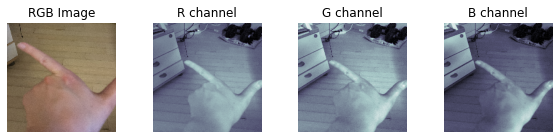

In [10]:
img_rgb = training_images[0]

plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB Image")

plt.subplot(142)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R channel")

plt.subplot(143)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G channel")

plt.subplot(144)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B channel")

plt.show()

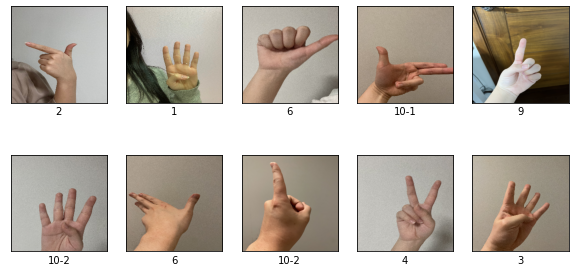

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,5])
for i in range(10):
    import random
    num = random.randint(0,858)
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label_df.label[num])
    plt.imshow(training_images[num])
plt.show()

In [12]:
print(np.unique(label_df.label))

['1' '10-1' '10-2' '2' '3' '4' '5' '6' '7' '8' '9']


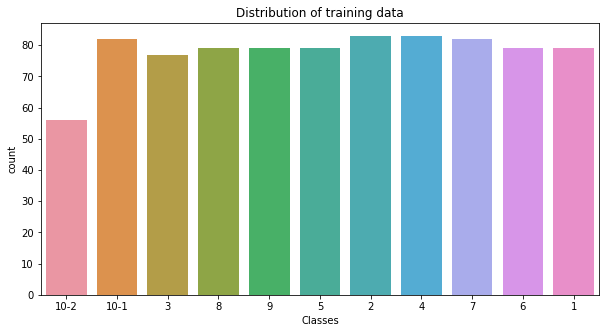

In [13]:
plt.figure(figsize=[10,5])
sns.countplot(label_df.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

In [14]:
label_df['label'][label_df['label'] == '10-1'] = 10 ## label : 10-1 -> 10
label_df['label'][label_df['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
label_df['label'] = label_df['label'].apply(lambda x : int(x)) ## Dtype : object -> int

In [15]:
print(np.unique(label_df.label))

[ 0  1  2  3  4  5  6  7  8  9 10]
